In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir('C:/Users/Hamza Zaib/Downloads/Compressed')

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

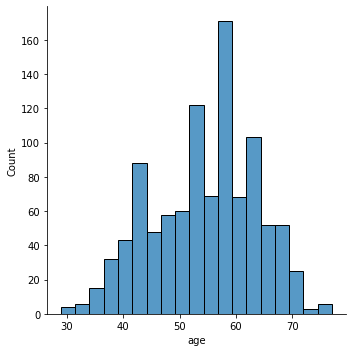

In [6]:
sns.displot(df['age'])
plt.show()

In [7]:
df.shape

(1025, 14)

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [10]:
df['sex'].value_counts().keys()

Int64Index([1, 0], dtype='int64')

In [11]:
df['sex'].value_counts().values

array([713, 312], dtype=int64)

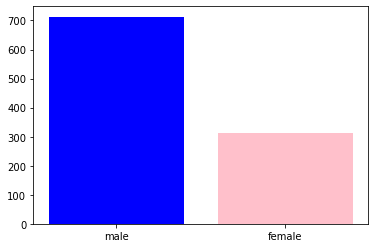

In [12]:
plt.bar(list(('male' , 'female')),list(df['sex'].value_counts()),color=['blue','pink'])
plt.show()

In [13]:
df['cp'].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

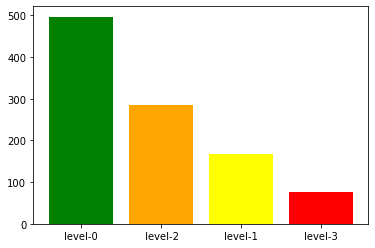

In [14]:
plt.bar(list(('level-0' , ' level-2' ,'level-1' , 'level-3')),list(df['cp'].value_counts()),color=['green','orange','yellow','red'])
plt.show()

C:\Users\Hamza Zaib\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


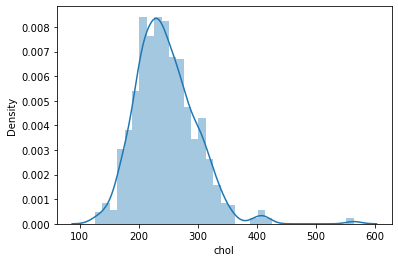

In [15]:
sns.distplot(df['chol'])
plt.show()

In [16]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

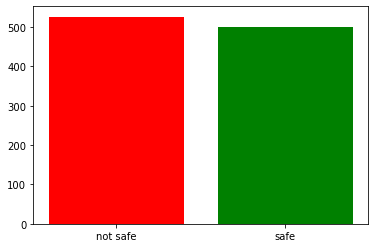

In [17]:
plt.bar(list(('not safe','safe')),list(df['target'].value_counts()),color=['red','green'])
plt.show()

In [18]:
X = df[['age','trestbps','chol','cp']]
y = df[['target']]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=0.3)

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
model = MultinomialNB()

In [23]:
model.fit(X_train,y_train)

C:\Users\Hamza Zaib\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB()

In [24]:
model.score(X_test,y_test)

0.7532467532467533

In [25]:
model.predict([[58,100,248,0]])

array([0], dtype=int64)